In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Exploring the Data, Part I

At this point, I sought to investigate the prevalence in the data of Metascore and Rotten Tomato ratings. 

I also created several synthetic columns for the number of films that each director had made, to determine if this had any bearing on the target of domestic box office grosses.

I also began to pare away rows that did not have a combination of budget, domestic gross, MPAA rating, and critical reception scores in the form of Rotten Tomatoes and Metascore ratings.  

During the first round of data scraping, I created a heatmap and pairplot to visualize the relationships of each feature with the target variable.
I also attempted one hot encoding of my first categorical variable, `genre_01`.  Finally, I created a very preliminary linear regression model.

For future work, I would like to investigate a way to synthesize the three genre keyword columns into one set of one hot encoded variables. However, time did not permit for this project deadline.


In [117]:
imdb_mojo_tomato = pd.read_json('imdb_mojo_tomato.json', lines=True)

In [435]:
itmb = pd.read_json('ITMB_data.json', lines=True)

In [436]:
itmb.head()

,title_x,imdb_id,title_link,year,runtime,mpaa_rating,director_name,director_id,director_link,genre_01,genre_02,genre_03,imdb_rating,votes,metascore,title_cc,title_string,dom_gross_x,release_date_x,title_y,tomatometer,tomato_ct,aud_score,aud_score_ct,title,release_date_y,budget,dom_gross_y,ww_gross,release_date2
0,10 Cloverfield Lane,tt1179933,/title/tt1179933/?ref_=adv_li_tt,2016.0,103.0,PG-13,Dan Trachtenberg,nm0870469,/name/nm0870469/?ref_=adv_li_dr_0,Action,Drama,Horror,7.2,289646.0,76.0,10_cloverfield_lane,10 Cloverfield Lane - Box Office Mojo,72082998,"March 10, 2016\n (EMEA, APAC)",10_cloverfield_lane,90.0,312.0,79.0,"60,968",10 Cloverfield Lane,1.451866e+12,15000000,72082999,72082999,"Jan 4, 2016"
1,12 Monkeys,tt0114746,/title/tt0114746/?ref_=adv_li_tt,1995.0,129.0,R,Terry Gilliam,nm0000416,/name/nm0000416/?ref_=adv_li_dr_0,Mystery,Sci-Fi,Thriller,8.0,577140.0,74.0,12_monkeys,12 Monkeys - Box Office Mojo,57141459,"December 29, 1995\n (Domestic)",12_monkeys,89.0,70.0,88.0,"391,142",12 Monkeys,8.200224e+11,29000000,57141459,57141459,"Dec 27, 1995"
2,12 Monkeys,tt0114746,/title/tt0114746/?ref_=adv_li_tt,1995.0,129.0,R,Terry Gilliam,nm0000416,/name/nm0000416/?ref_=adv_li_dr_0,Mystery,Sci-Fi,Thriller,8.0,577140.0,74.0,12_monkeys,12 Monkeys - Box Office Mojo,57141459,"December 29, 1995\n (Domestic)",12_monkeys,89.0,70.0,88.0,"391,142",12 Monkeys,8.200224e+11,29000000,57141459,57141459,"Dec 27, 1995"
3,2012,tt1190080,/title/tt1190080/?ref_=adv_li_tt,2009.0,158.0,PG-13,Roland Emmerich,nm0000386,/name/nm0000386/?ref_=adv_li_dr_0,Action,Adventure,Sci-Fi,5.8,352570.0,49.0,2012,2012 - Box Office Mojo,166112167,"November 11, 2009\n (EMEA)",2012,39.0,246.0,47.0,"508,352",2012,1.257984e+12,200000000,166112167,166112167,"Nov 12, 2009"
4,2046,tt0212712,/title/tt0212712/?ref_=adv_li_tt,2004.0,129.0,R,Kar-Wai Wong,nm0939182,/name/nm0939182/?ref_=adv_li_dr_0,Drama,Romance,Sci-Fi,7.4,50789.0,78.0,2046,2046 - Box Office Mojo,1444588,"September 29, 2004\n (Hong Kong)",2046,86.0,119.0,85.0,"46,734",2046,1.100822e+12,12000000,1442338,1442338,"Nov 19, 2004"


In [437]:
itmb.shape

(554, 30)

In [438]:
itmb['imdb_rating'].isna().sum()

15

In [439]:
itmb['votes'].isna().sum()

15

In [440]:
itmb['metascore'].isna().sum()

61

In [441]:
itmb_no_nan = itmb

In [442]:
itmb_no_nan.describe()

,year,runtime,imdb_rating,votes,metascore,dom_gross_x,tomatometer,tomato_ct,aud_score,release_date_y,budget,dom_gross_y,ww_gross
count,546.000000,542.000000,539.000000,5.390000e+02,493.000000,5.540000e+02,408.000000,367.000000,366.000000,5.530000e+02,5.540000e+02,5.540000e+02,5.540000e+02
mean,2002.992674,109.562731,6.308534,1.903945e+05,52.610548,6.743773e+07,52.781863,141.414169,57.814208,1.110123e+12,6.179270e+07,7.219917e+07,7.219917e+07
std,15.387352,20.311865,1.119463,2.463157e+05,18.190681,1.006810e+08,27.892633,99.715100,20.970388,3.567319e+11,5.584269e+07,9.981513e+07,9.981513e+07
min,1927.000000,70.000000,1.900000,4.720000e+02,6.000000,0.000000e+00,0.000000,5.000000,11.000000,-2.069280e+11,3.000000e+06,0.000000e+00,0.000000e+00
25%,1997.000000,96.000000,5.700000,3.509050e+04,40.000000,7.129766e+06,28.000000,60.000000,42.250000,9.030528e+11,1.800000e+07,1.406267e+07,1.406267e+07
50%,2007.000000,106.000000,6.400000,9.959800e+04,52.000000,3.280062e+07,50.000000,119.000000,58.000000,1.196381e+12,4.000000e+07,3.811948e+07,3.811948e+07
75%,2014.000000,119.000000,7.100000,2.397065e+05,65.000000,8.168087e+07,79.250000,210.500000,76.000000,1.394755e+12,9.000000e+07,8.889198e+07,8.889198e+07
max,2021.000000,263.000000,8.800000,2.060446e+06,98.000000,7.605076e+08,100.000000,525.000000,95.000000,1.619050e+12,3.000000e+08,7.605076e+08,7.605076e+08


In [443]:
itmb['genre_01'].value_counts()

Action       299
Drama         72
Adventure     47
Comedy        43
Animation     40
Horror        36
Mystery        6
Sci-Fi         6
Fantasy        2
Crime          1
Romance        1
Family         1
Name: genre_01, dtype: int64

In [444]:
itmb['mpaa_rating'].value_counts()

PG-13        228
R            172
PG           101
G             11
Not Rated     10
Approved       7
Passed         3
TV-MA          3
X              1
TV-PG          1
Name: mpaa_rating, dtype: int64

In [445]:
itmb_no_nan2 = itmb_no_nan.copy()

In [446]:
dropped_ratings = ['TV-MA', 'Approved', 'TV-14', 'Unrated', 'Passed', 'TV-G', 'M','TV-PG','X','AO','TV-Y7','GP']



In [507]:
itmb_rated = itmb_no_nan2[~itmb_no_nan2['mpaa_rating'].isin(dropped_ratings)]

In [508]:
itmb_rated.shape

(539, 30)

In [509]:
itmb_rated.head()

,title_x,imdb_id,title_link,year,runtime,mpaa_rating,director_name,director_id,director_link,genre_01,genre_02,genre_03,imdb_rating,votes,metascore,title_cc,title_string,dom_gross_x,release_date_x,title_y,tomatometer,tomato_ct,aud_score,aud_score_ct,title,release_date_y,budget,dom_gross_y,ww_gross,release_date2
0,10 Cloverfield Lane,tt1179933,/title/tt1179933/?ref_=adv_li_tt,2016.0,103.0,PG-13,Dan Trachtenberg,nm0870469,/name/nm0870469/?ref_=adv_li_dr_0,Action,Drama,Horror,7.2,289646.0,76.0,10_cloverfield_lane,10 Cloverfield Lane - Box Office Mojo,72082998,"March 10, 2016\n (EMEA, APAC)",10_cloverfield_lane,90.0,312.0,79.0,"60,968",10 Cloverfield Lane,1.451866e+12,15000000,72082999,72082999,"Jan 4, 2016"
1,12 Monkeys,tt0114746,/title/tt0114746/?ref_=adv_li_tt,1995.0,129.0,R,Terry Gilliam,nm0000416,/name/nm0000416/?ref_=adv_li_dr_0,Mystery,Sci-Fi,Thriller,8.0,577140.0,74.0,12_monkeys,12 Monkeys - Box Office Mojo,57141459,"December 29, 1995\n (Domestic)",12_monkeys,89.0,70.0,88.0,"391,142",12 Monkeys,8.200224e+11,29000000,57141459,57141459,"Dec 27, 1995"
2,12 Monkeys,tt0114746,/title/tt0114746/?ref_=adv_li_tt,1995.0,129.0,R,Terry Gilliam,nm0000416,/name/nm0000416/?ref_=adv_li_dr_0,Mystery,Sci-Fi,Thriller,8.0,577140.0,74.0,12_monkeys,12 Monkeys - Box Office Mojo,57141459,"December 29, 1995\n (Domestic)",12_monkeys,89.0,70.0,88.0,"391,142",12 Monkeys,8.200224e+11,29000000,57141459,57141459,"Dec 27, 1995"
3,2012,tt1190080,/title/tt1190080/?ref_=adv_li_tt,2009.0,158.0,PG-13,Roland Emmerich,nm0000386,/name/nm0000386/?ref_=adv_li_dr_0,Action,Adventure,Sci-Fi,5.8,352570.0,49.0,2012,2012 - Box Office Mojo,166112167,"November 11, 2009\n (EMEA)",2012,39.0,246.0,47.0,"508,352",2012,1.257984e+12,200000000,166112167,166112167,"Nov 12, 2009"
4,2046,tt0212712,/title/tt0212712/?ref_=adv_li_tt,2004.0,129.0,R,Kar-Wai Wong,nm0939182,/name/nm0939182/?ref_=adv_li_dr_0,Drama,Romance,Sci-Fi,7.4,50789.0,78.0,2046,2046 - Box Office Mojo,1444588,"September 29, 2004\n (Hong Kong)",2046,86.0,119.0,85.0,"46,734",2046,1.100822e+12,12000000,1442338,1442338,"Nov 19, 2004"


In [56]:
pd.set_option('display.max_rows', 100)

In [510]:
director_counts = itmb_rated['director_name'].value_counts()[0:100]

In [262]:
director_counts

Paul Verhoeven           7
Roland Emmerich          7
M. Night Shyamalan       5
Paul W.S. Anderson       5
Steven Spielberg         5
Christopher Nolan        4
Terry Gilliam            4
Michael Bay              4
Luc Besson               4
Robert Zemeckis          4
Ridley Scott             4
Zack Snyder              4
John Carpenter           4
James Cameron            4
Joss Whedon              4
Andrew Niccol            3
Peter Hyams              3
Jonathan Liebesman       3
Robert Rodriguez         3
David Cronenberg         3
Neill Blomkamp           3
Chris Columbus           3
José Padilha             3
Franklin J. Schaffner    3
Barry Sonnenfeld         3
David Twohy              3
J.J. Abrams              3
Denis Villeneuve         3
Ruben Fleischer          3
Katsuhiro Ôtomo          3
Tim Burton               3
Joel Schumacher          3
Brad Bird                3
Doug Liman               3
Neil Marshall            3
Matt Reeves              3
Jon Favreau              3
N

In [511]:
director_counts2 = director_counts[director_counts > 2].reset_index()

In [512]:
director_counts4 = director_counts[director_counts >= 4].reset_index()

In [513]:
director_counts7 = director_counts[director_counts >= 7].reset_index()

In [514]:
director_counts2.shape

(37, 2)

In [515]:
director_counts4.shape

(15, 2)

In [516]:
director_counts7.shape

(2, 2)

In [517]:
itmb_rated['director_count2'] = np.where(itmb_rated['director_name'].isin(director_counts2['index']), 1,0)

<ipython-input-517-bfd594b53d19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itmb_rated['director_count2'] = np.where(itmb_rated['director_name'].isin(director_counts2['index']), 1,0)


In [518]:
itmb_rated['director_count4'] = np.where(itmb_rated['director_name'].isin(director_counts4['index']), 1,0)

<ipython-input-518-65daaaa3fe79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itmb_rated['director_count4'] = np.where(itmb_rated['director_name'].isin(director_counts4['index']), 1,0)


In [519]:
itmb_rated['director_count7'] = np.where(itmb_rated['director_name'].isin(director_counts7['index']), 1,0)

<ipython-input-519-e20605b4d114>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itmb_rated['director_count7'] = np.where(itmb_rated['director_name'].isin(director_counts7['index']), 1,0)


In [226]:
itmb_rated = itmb_rated.sort_values(by='year', ascending=False)

In [520]:
itmb_rated[['director_name', 'director_count2']]

,director_name,director_count2
0,Dan Trachtenberg,0
1,Terry Gilliam,1
2,Terry Gilliam,1
3,Roland Emmerich,1
4,Kar-Wai Wong,0
5,Juan Carlos Fresnadillo,0
6,Shane Acker,0
7,John Krasinski,0
8,John Krasinski,0
9,Richard Linklater,0


In [521]:
itmb_rated.columns

Index(['title_x', 'imdb_id', 'title_link', 'year', 'runtime', 'mpaa_rating',
       'director_name', 'director_id', 'director_link', 'genre_01', 'genre_02',
       'genre_03', 'imdb_rating', 'votes', 'metascore', 'title_cc',
       'title_string', 'dom_gross_x', 'release_date_x', 'title_y',
       'tomatometer', 'tomato_ct', 'aud_score', 'aud_score_ct', 'title',
       'release_date_y', 'budget', 'dom_gross_y', 'ww_gross', 'release_date2',
       'director_count2', 'director_count4', 'director_count7'],
      dtype='object')

In [522]:
itmb_rated = itmb_rated.drop(columns=['title_link', 'director_id', 'director_link',
       'title_string',  'release_date_x', 'title_y','title','release_date_y'])

In [523]:
itmb_rated = itmb_rated.rename(columns={"title_x": "title", "release_date2": "release_date", "director_count2":"dir_film_ct2", "director_count4":"dir_film_ct4"})

In [524]:
itmb_rated.columns

Index(['title', 'imdb_id', 'year', 'runtime', 'mpaa_rating', 'director_name',
       'genre_01', 'genre_02', 'genre_03', 'imdb_rating', 'votes', 'metascore',
       'title_cc', 'dom_gross_x', 'tomatometer', 'tomato_ct', 'aud_score',
       'aud_score_ct', 'budget', 'dom_gross_y', 'ww_gross', 'release_date',
       'dir_film_ct2', 'dir_film_ct4', 'director_count7'],
      dtype='object')

In [304]:
pd.set_option('display.max_rows', None)

In [525]:
itmb_rated = itmb_rated.drop_duplicates()

In [777]:
itmb_rated = itmb_rated.drop([464])

In [778]:
itmb_rated.shape

(482, 25)

In [779]:
itmb_rated = itmb_rated.reset_index()

In [780]:
itmb_rated = itmb_rated.drop(columns='index')

In [781]:
itmb_rated[['title', 'title_cc', 'year','release_date']]

,title,title_cc,year,release_date
0,10 Cloverfield Lane,10_cloverfield_lane,2016.0,"Jan 4, 2016"
1,12 Monkeys,12_monkeys,1995.0,"Dec 27, 1995"
2,2012,2012,2009.0,"Nov 12, 2009"
3,2046,2046,2004.0,"Nov 19, 2004"
4,28 Weeks Later,28_weeks_later,2007.0,"May 11, 2007"
5,9,9,2009.0,"Sep 9, 2009"
6,A Quiet Place,a_quiet_place,2018.0,"Apr 4, 2018"
7,A Quiet Place Part II,a_quiet_place_part_ii,2020.0,"Apr 22, 2021"
8,A Scanner Darkly,a_scanner_darkly,2006.0,"Jul 7, 2006"
9,A Sound of Thunder,a_sound_of_thunder,2005.0,"Sep 2, 2005"


In [782]:
itmb_rated[446:450]

,title,imdb_id,year,runtime,mpaa_rating,director_name,genre_01,genre_02,genre_03,imdb_rating,votes,metascore,title_cc,dom_gross_x,tomatometer,tomato_ct,aud_score,aud_score_ct,budget,dom_gross_y,ww_gross,release_date,dir_film_ct2,dir_film_ct4,director_count7
446,Total Recall,tt0100802,1990.0,113.0,R,Paul Verhoeven,Action,Sci-Fi,Thriller,7.5,301843.0,57.0,total_recall,119412921,82.0,72.0,78.0,"244,683",65000000,119394839,119394839,"Jun 1, 1990",1,1,1
447,Total Recall,tt1386703,2012.0,118.0,PG-13,Len Wiseman,Action,Adventure,Sci-Fi,6.3,239951.0,43.0,total_recall,58877969,82.0,72.0,78.0,"244,683",125000000,58877969,58877969,"Aug 3, 2012",0,0,0
448,Transcendence,tt2209764,2014.0,119.0,PG-13,Wally Pfister,Action,Drama,Sci-Fi,6.3,216592.0,42.0,transcendence,23022309,NaN,NaN,NaN,None,100000000,23022309,23022309,"Apr 18, 2014",0,0,0
449,Transformers,tt0418279,2007.0,144.0,PG-13,Michael Bay,Action,Adventure,Sci-Fi,7.0,595170.0,61.0,transformers,319246193,NaN,NaN,NaN,None,151000000,319246193,319246193,"Jul 2, 2007",1,1,0


In [784]:
itmb_rated['tomatometer'].describe()

count    357.000000
mean      53.022409
std       27.555757
min        0.000000
25%       29.000000
50%       51.000000
75%       78.000000
max      100.000000
Name: tomatometer, dtype: float64

In [785]:
itmb_rated['metascore'].describe()

count    443.000000
mean      52.101580
std       17.792445
min        6.000000
25%       40.000000
50%       51.000000
75%       65.000000
max       96.000000
Name: metascore, dtype: float64

In [786]:
itmb_rated['mpaa_rating'].value_counts()

PG-13        209
R            158
PG            93
G              8
Not Rated      6
Name: mpaa_rating, dtype: int64

In [787]:
itmb_rated['mpaa_rating'].describe

<bound method NDFrame.describe of 0          PG-13
1              R
2          PG-13
3              R
4              R
5          PG-13
6          PG-13
7          PG-13
8              R
9          PG-13
10            PG
11     Not Rated
12             R
13             R
14         PG-13
15         PG-13
16             R
17             R
18             R
19            PG
20             R
21             R
22             R
23     Not Rated
24         PG-13
25         PG-13
26             R
27         PG-13
28          None
29         PG-13
30            PG
31            PG
32             R
33         PG-13
34          None
35            PG
36            PG
37            PG
38            PG
39         PG-13
40         PG-13
41         PG-13
42         PG-13
43            PG
44             G
45             R
46            PG
47            PG
48         PG-13
49             R
50         PG-13
51             R
52             R
53             R
54         PG-13
55             R
56            

In [789]:
itmb_rated.to_json('itmb_rated_cleaned.json', orient='records', lines=True)

##  Here is the end of processing my final project data

In [149]:
imdb_rated['mpaa_rating'] = imdb_rated['mpaa_rating'].replace(np.nan, 'Not Rated')

In [150]:
imdb_rated['mpaa_rating'].describe

<bound method NDFrame.describe of 1796    Not Rated
1540    Not Rated
1060    Not Rated
1332    Not Rated
1915    Not Rated
          ...    
2029            R
2041    Not Rated
2045    Not Rated
2078    Not Rated
2079    Not Rated
Name: mpaa_rating, Length: 1890, dtype: object>

In [151]:
from sklearn.preprocessing import OneHotEncoder

In [175]:
cat_X = imdb_rated.loc[:,['mpaa_rating']]
cat_X

,mpaa_rating
1796,Not Rated
1540,Not Rated
1060,Not Rated
1332,Not Rated
1915,Not Rated
...,...
2029,R
2041,Not Rated
2045,Not Rated
2078,Not Rated


In [176]:
cat_y = imdb_rated['imdb_rating']

In [177]:
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(cat_X)

ohe_X = ohe.transform(cat_X)

columns = ohe.get_feature_names(['mpaa_rating'])

ohe_X_df = pd.DataFrame(ohe_X, columns=columns, index=cat_X.index)

ohe_X_df.head()
#ohe_X_df.shape

,mpaa_rating_Not Rated,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R
1796,1.0,0.0,0.0,0.0
1540,1.0,0.0,0.0,0.0
1060,1.0,0.0,0.0,0.0
1332,1.0,0.0,0.0,0.0
1915,1.0,0.0,0.0,0.0


In [178]:
ohe_X_df.shape

(1890, 4)

In [179]:
imdb_ohe = pd.concat([imdb_rated, ohe_X_df], axis=1)

In [180]:
imdb_ohe.shape

(1890, 30)

In [181]:
imdb_rated.columns

Index(['title_x', 'imdb_id', 'title_link', 'year', 'runtime', 'mpaa_rating',
       'director_name', 'director_id', 'director_link', 'genre_01', 'genre_02',
       'genre_03', 'imdb_rating', 'votes', 'metascore', 'title_cc',
       'title_string', 'dom_gross', 'release_date', 'tomatometer', 'tomato_ct',
       'aud_score', 'aud_score_ct', 'director_count2', 'director_count4',
       'director_count7'],
      dtype='object')

In [788]:
itmb_rated['genre_01'].value_counts()

Action       264
Drama         61
Comedy        40
Adventure     38
Animation     36
Horror        29
Sci-Fi         5
Mystery        4
Fantasy        2
Crime          1
Romance        1
Family         1
Name: genre_01, dtype: int64

In [182]:
cat_X = imdb_rated.loc[:,['genre_01']]
cat_X

,genre_01
1796,Action
1540,Action
1060,Action
1332,Action
1915,Action
...,...
2029,Sci-Fi
2041,Action
2045,Sci-Fi
2078,Drama


In [183]:
cat_y = imdb_rated['genre_01']

In [184]:
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(cat_X)

ohe_genre = ohe.transform(cat_X)

columns = ohe.get_feature_names(['genre_01'])

ohe_genre_df = pd.DataFrame(ohe_genre, columns=columns, index=cat_X.index)

ohe_genre_df.head()
ohe_genre_df.shape

(1890, 15)

In [185]:
imdb_ohe = pd.concat([imdb_ohe, ohe_genre_df], axis=1)

In [186]:
imdb_ohe.shape

(1890, 45)

In [187]:
pd.set_option('display.max_columns', 100)

In [188]:
imdb_ohe.head()

,title_x,imdb_id,title_link,year,runtime,mpaa_rating,director_name,director_id,director_link,genre_01,genre_02,genre_03,imdb_rating,votes,metascore,title_cc,title_string,dom_gross,release_date,tomatometer,tomato_ct,aud_score,aud_score_ct,director_count2,director_count4,director_count7,mpaa_rating_Not Rated,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R,genre_01_Adventure,genre_01_Animation,genre_01_Biography,genre_01_Comedy,genre_01_Crime,genre_01_Documentary,genre_01_Drama,genre_01_Family,genre_01_Fantasy,genre_01_Horror,genre_01_Music,genre_01_Musical,genre_01_Mystery,genre_01_Romance,genre_01_Sci-Fi
1796,Avatar 5,tt5637536,/title/tt5637536/?ref_=adv_li_tt,2028.0,NaN,Not Rated,James Cameron,nm0000116,/name/nm0000116/?ref_=adv_li_dr_0,Action,Adventure,Drama,NaN,NaN,NaN,avatar_5,Avatar 5 - Box Office Mojo,None,"December 22, 2028\n (Domestic)",NaN,NaN,NaN,None,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1540,Avatar 4,tt3095356,/title/tt3095356/?ref_=adv_li_tt,2026.0,NaN,Not Rated,James Cameron,nm0000116,/name/nm0000116/?ref_=adv_li_dr_0,Action,Adventure,Fantasy,NaN,NaN,NaN,avatar_4,Avatar 4 - Box Office Mojo,None,"December 18, 2026\n (Domestic)",NaN,NaN,NaN,None,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1060,Untitled Taika Waititi Star Wars Film,tt10300396,/title/tt10300396/?ref_=adv_li_tt,2025.0,NaN,Not Rated,Taika Waititi,nm0169806,/name/nm0169806/?ref_=adv_li_dr_0,Action,Adventure,Fantasy,NaN,NaN,NaN,untitled_taika_waititi_star_wars_film,Untitled Taika Waititi Star Wars Film - Box Of...,None,"December 19, 2025\n (Domestic)",NaN,NaN,NaN,None,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1332,Avatar 3,tt1757678,/title/tt1757678/?ref_=adv_li_tt,2024.0,NaN,Not Rated,James Cameron,nm0000116,/name/nm0000116/?ref_=adv_li_dr_0,Action,Adventure,Fantasy,NaN,NaN,NaN,avatar_3,Avatar 3 - Box Office Mojo,None,"December 20, 2024\n (Domestic)",NaN,NaN,NaN,None,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1915,Guardians of the Galaxy Vol. 3,tt6791350,/title/tt6791350/?ref_=adv_li_tt,2023.0,NaN,Not Rated,James Gunn,nm0348181,/name/nm0348181/?ref_=adv_li_dr_0,Action,Adventure,Comedy,NaN,NaN,NaN,guardians_of_the_galaxy_vol._3,Guardians of the Galaxy Vol. 3 - Box Office Mojo,None,None,NaN,NaN,NaN,None,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
imdb_ohe.columns

Index(['title_x', 'imdb_id', 'title_link', 'year', 'runtime', 'mpaa_rating',
       'director_name', 'director_id', 'director_link', 'genre_01', 'genre_02',
       'genre_03', 'imdb_rating', 'votes', 'metascore', 'title_cc',
       'title_string', 'dom_gross', 'release_date', 'tomatometer', 'tomato_ct',
       'aud_score', 'aud_score_ct', 'director_count2', 'director_count4',
       'director_count7', 'mpaa_rating_Not Rated', 'mpaa_rating_PG',
       'mpaa_rating_PG-13', 'mpaa_rating_R', 'genre_01_Adventure',
       'genre_01_Animation', 'genre_01_Biography', 'genre_01_Comedy',
       'genre_01_Crime', 'genre_01_Documentary', 'genre_01_Drama',
       'genre_01_Family', 'genre_01_Fantasy', 'genre_01_Horror',
       'genre_01_Music', 'genre_01_Musical', 'genre_01_Mystery',
       'genre_01_Romance', 'genre_01_Sci-Fi'],
      dtype='object')

In [196]:
movie_features = imdb_ohe[['title_x', 'year', 'runtime', 'mpaa_rating', 
                           'imdb_rating', 'director_name','votes', 'metascore', 'dom_gross', 
                           'tomatometer', 'tomato_ct', 'aud_score', 
                           'aud_score_ct', 'director_count2', 'director_count4',
                           'director_count7', 'mpaa_rating_Not Rated', 'mpaa_rating_PG',
       'mpaa_rating_PG-13', 'mpaa_rating_R', 'genre_01_Adventure',
       'genre_01_Animation', 'genre_01_Biography', 'genre_01_Comedy',
       'genre_01_Crime', 'genre_01_Documentary', 'genre_01_Drama',
       'genre_01_Family', 'genre_01_Fantasy', 'genre_01_Horror',
       'genre_01_Music', 'genre_01_Musical', 'genre_01_Mystery',
       'genre_01_Romance', 'genre_01_Sci-Fi']]

In [197]:
movie_features.head()

,title_x,year,runtime,mpaa_rating,imdb_rating,director_name,votes,metascore,dom_gross,tomatometer,tomato_ct,aud_score,aud_score_ct,director_count2,director_count4,director_count7,mpaa_rating_Not Rated,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R,genre_01_Adventure,genre_01_Animation,genre_01_Biography,genre_01_Comedy,genre_01_Crime,genre_01_Documentary,genre_01_Drama,genre_01_Family,genre_01_Fantasy,genre_01_Horror,genre_01_Music,genre_01_Musical,genre_01_Mystery,genre_01_Romance,genre_01_Sci-Fi
1796,Avatar 5,2028.0,NaN,Not Rated,NaN,James Cameron,NaN,NaN,None,NaN,NaN,NaN,None,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1540,Avatar 4,2026.0,NaN,Not Rated,NaN,James Cameron,NaN,NaN,None,NaN,NaN,NaN,None,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1060,Untitled Taika Waititi Star Wars Film,2025.0,NaN,Not Rated,NaN,Taika Waititi,NaN,NaN,None,NaN,NaN,NaN,None,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1332,Avatar 3,2024.0,NaN,Not Rated,NaN,James Cameron,NaN,NaN,None,NaN,NaN,NaN,None,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1915,Guardians of the Galaxy Vol. 3,2023.0,NaN,Not Rated,NaN,James Gunn,NaN,NaN,None,NaN,NaN,NaN,None,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
movie_features.shape

(1890, 35)

In [199]:
movie_features.to_json('movie_features.json', orient='records', lines=True)

In [113]:
cat_X2 = imdb_rated.loc[:, ["genre_01"]]
cat_y = imdb_rated['imdb_rating']

In [114]:
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(cat_X2)

ohe_X2 = ohe.transform(cat_X2)

columns = ohe.get_feature_names(['genre_01'])

ohe_X2_df = pd.DataFrame(ohe_X2, columns=columns, index=cat_X2.index)

ohe_X2_df.shape, ohe_X2_df.head()

((805, 12),
    genre_01_Adventure  genre_01_Animation  genre_01_Biography  \
 0                 0.0                 0.0                 0.0   
 1                 0.0                 0.0                 0.0   
 2                 0.0                 0.0                 0.0   
 4                 0.0                 0.0                 0.0   
 6                 1.0                 0.0                 0.0   
 
    genre_01_Comedy  genre_01_Crime  genre_01_Drama  genre_01_Family  \
 0              0.0             0.0             0.0              0.0   
 1              0.0             0.0             1.0              0.0   
 2              0.0             0.0             0.0              0.0   
 4              0.0             0.0             0.0              0.0   
 6              0.0             0.0             0.0              0.0   
 
    genre_01_Fantasy  genre_01_Horror  genre_01_Music  genre_01_Mystery  \
 0               0.0              0.0             0.0               0.0   
 1    

In [115]:
cat2_lr = LinearRegression()

cat2_lr.fit(ohe_X2_df, cat_y)

cat2_lr.score(ohe_X2_df, cat_y)

0.04777595503503451

In [116]:
cat2_lr.coef_

array([ 0.22150794,  0.64003876,  0.05166667, -0.24083333,  0.735     ,
        0.19452381, -0.34833333, -0.38833333, -0.26261905, -1.74833333,
        0.76833333,  0.185     ])

In [28]:
imdb_df.corr()

,year,runtime,imdb_rating,votes,metascore
year,1.000000,NaN,-0.138075,0.107455,-0.128747
runtime,NaN,NaN,NaN,NaN,NaN
imdb_rating,-0.138075,NaN,1.000000,0.451584,0.727644
votes,0.107455,NaN,0.451584,1.000000,0.362624
metascore,-0.128747,NaN,0.727644,0.362624,1.000000


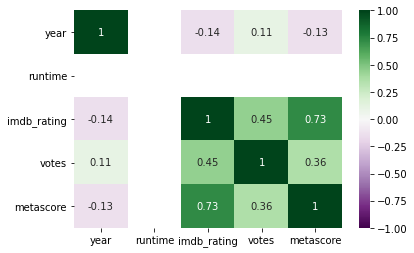

In [46]:
sns.heatmap(imdb_df.corr(), cmap="PRGn", annot=True, vmin=-1, vmax=1);

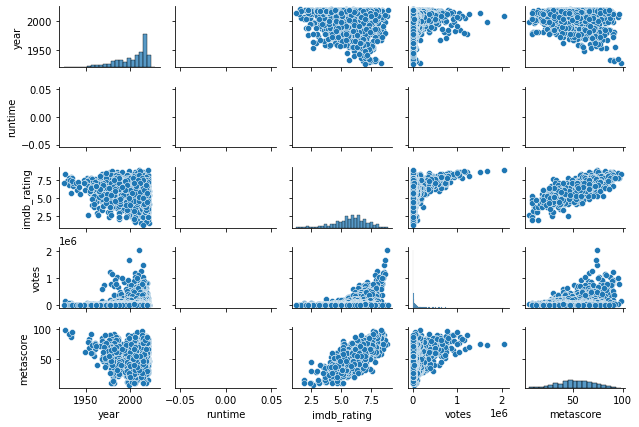

In [47]:
sns.pairplot(imdb_df, height = 1.2, aspect=1.5);

### Linear Regression with sklearn

In [74]:
# Create an empty model
lr = LinearRegression()

# choose predictor variables
X = imdb_no_nan[['votes','metascore']]

# choose response variable
y = imdb_no_nan['imdb_rating']

# fit the model to the full dataset
lr.fit(X,y)

# print out the R^2 for the model against the full dataset
lr.score(X,y)

0.627980943634967